### Importación de librerías necesarias

In [1]:
import numpy as np
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as stat
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import levene
from sklearn import preprocessing

### Lectura del dataset
[Link del dataset](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data)

Este dataset tiene información de transacciones de personas y también una ultima columna la cual identifica cuales son fraudulentas o no. Esta información esta anonimizada para proteger la privacidad de las personas, es por esta razón que tanto los valores como el nombre de las columnas con Vs tienen valores numero que representan de cierta forma el valor que tenían antes. En la descripción del dataset nos indica que las columnas con Vs representan datos como fechas, horas, lugar de la transacción, etc. También tenemos otros datos no anonimizados como `Ammount` el cual es el monto de la transacción y también Class, el cual es una variable categórica que representa si la transacción fue fraudulenta o no donde 1 es que si fue fraudulenta y 0 que no.

In [2]:
credit_card_df = pd.read_csv('creditcard_2023.csv')
credit_card_df.shape

(568630, 31)

### Primera impresiones
Primeramente, teniendo en cuenta que el problema que resolveremos mediante un modelo sera de clasificación, procederemos a mostrar la cantidad de 0s y 1s, ya que este dataset trata se mostrar que transacción es fraudulenta (1) y cual no (0).

In [3]:
ones_count = credit_card_df['Class'].sum()
zeros_count = len(credit_card_df['Class']) - ones_count
print(f'Cantidad de 1s {ones_count} Cantidad de 0s {zeros_count}')

Cantidad de 1s 284315 Cantidad de 0s 284315


Como podemos observar, la cantidad de 1s y 0s, es la misma, ahora procederemos a realizar el análisis descriptivo para tener un mejor conocimiento de como se comportan nuestro datos.

In [4]:
credit_card_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [15]:
credit_card_df.isnull().values.any()

False

### Análisis descriptivo
Como podemos observar, en las columnas de Vs se tiene una desviación estándar de prácticamente 1. Esto nos llama la atención ya que sugiere que los datos tienen poca variabilidad con respeto a la media, pero si comparamos los valores mínimos y máximos con la media, existe una diferencia muy grande y esto llama aun mas la atención teniendo en cuenta la desviación estándar que tienen.
Por otro lado, las demás columnas, tienen valores de desviación estándar mas grandes, pero los valores de máximos y mínimos no varían demasiado con respecto a la media.
También notamos que si hacemos la multiplicación del `Q3 * 1.5` y `Q3 * 1.5` para obtener el bigote superiores e inferiores, notaremos que el valor de los mismos, en el caso de las Vs esta fuera de esos rangos, lo que sugiera que existen valores atípicos. Para demostrar esto, procederemos a crear los diagramas de caja respectivos.

### Diagrama de caja
Primero vamos a normalizar los datos dentro de unos grupos o chunks de 3 ya que anteriormente se intento hacer los diagramas de las 27 columnas, pero como era de esperarse, la carga de memoria y procesamiento hizo que nunca se puede mostrar las gráficas.

In [5]:
def scale_dataframe_data(df):
    z_scaler = preprocessing.StandardScaler()
    scaled_information=z_scaler.fit_transform(df)
    return pd.DataFrame(scaled_information,columns=df.columns)

In [6]:
credit_card_df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

A continuación se hará la creación de los grupos de 3 columnas en una lista resulta de tamaño 9.

In [7]:
xs = []
j = 0
for i in range(9):
    xi = credit_card_df.iloc[:, list(range(j,3*i+3))]
    xi = scale_dataframe_data(xi)
    xi = np.round(xi, 4)
    xs.append(xi)
    j = 3*i+3

print(f'Lista de tamaño {len(xs)} que incluyen dataframes de tamaño {xs[0].shape}.')
print('Es decir, se tiene una lista de 9 dataframes de 3 columnas cada uno.')

Lista de tamaño 9 que incluyen dataframes de tamaño (568630, 3).
Es decir, se tiene una lista de 9 dataframes de 3 columnas cada uno.


Ahora procederemos a crear los diagramas de caja para cada chunk
#### Nota
Se intento dejar los diagramas de caja para cada chunk pero como era de esperarse, la carga en la memoria no permite dejar mas de 3 diagramas en el notebook a la vez. Es por esta razón que se mostraran las gráficas generadas (1 a 1) como imagines debajo del código que las genero, dicho código estará en formato markdown y puede ser usado en caso de ser deseado. 

Code: `px.box(xs[0]).show()`
![Boxplot del primer grupo](assets/xs[0].png)

Code: `px.box(xs[1]).show()`
![Boxplot del segundo grupo](assets/xs[1].png)

Code: `px.box(xs[2]).show()`
![Boxplot del tercer grupo](assets/xs[2].png)

Code: `px.box(xs[3]).show()`
![Boxplot del cuarto grupo](assets/xs[3].png)

Code: `px.box(xs[4]).show()`
![Boxplot del quinto grupo](assets/xs[4].png)

Code: `px.box(xs[5]).show()`
![Boxplot del sexto grupo](assets/xs[5].png)

Code: `px.box(xs[6]).show()`
![Boxplot del septimo grupo](assets/xs[6].png)

Code: `px.box(xs[7]).show()`
![Boxplot del octavo grupo](assets/xs[7].png)

Code: `px.box(xs[8]).show()`
![Boxplot del noveno grupo](assets/xs[8].png)

Como se puede notar, los valores atípicos existen, tal vez no es tan notorio en todas las columnas, pero existen. Antes de proceder a borrar esos datos atípicos, primero queremos notar la correlación de esas variables respecto a `Class` para conocer cuales son mas relevantes para nuestro modelo.

In [8]:
corr_column_class_serie = credit_card_df.corr()['Class']
corr_column_class_serie = corr_column_class_serie.sort_values(ascending=True)
corr_column_class_df = corr_column_class_serie.to_frame()
corr_column_class_df.style.background_gradient(cmap='coolwarm')

,Class
V14,-0.805669
V12,-0.768579
V3,-0.682095
V10,-0.673665
V9,-0.585522
V16,-0.573511
V1,-0.505761
V7,-0.491234
V17,-0.476377
V6,-0.435088


Increíblemente, el valor de Amount no tiene relación alguna con nuestra variable objetivo. Analizando las demás podemos notar que tenemos bastantes tanto con relación fuerte como con relación moderada según la siguiente tabla.

| Valor absoluto de $r$ | Fuerza de la relación |
|-----------------------|-----------------------|
| $ r <0,25 $           | Sin relación          |
| $ 0,25 <r <0,5 $      | Relación débil        |
| $ 0,5 <r <0,75 $      | Relación moderada     |
| $ r> 0,75 $           | Relación fuerte       |

Fuente: [Statologos. (2021). ¿Qué se considera una correlación «débil»? Statologos.](https://statologos.com/que-es-una-correlacion-debil/#google_vignette)

Ahora procederemos a separar dichas columnas de acuerdo a sus correlaciones, cabe aclarar que no tomaremos en cuenta las variables con correlación débil a no ser que nuestro modelo tenga métricas bajas y que guardaremos sus indices para guardar cada una con su respectiva etiqueta.

In [9]:
index_of_columns = []
i = 0
for corr in corr_column_class_serie:
    if abs(corr) > 0.5:
        index_of_columns.append(i)
    i += 1
    
moderate_corr_column_class_serie = corr_column_class_serie[index_of_columns]

moderate_corr_column_class_df = moderate_corr_column_class_serie.to_frame()
list_of_columns = moderate_corr_column_class_df.index.values
moderate_corr_column_class_df = moderate_corr_column_class_df.drop(['Class'])

moderate_corr_column_class_df.style.background_gradient(cmap='coolwarm')

,Class
V14,-0.805669
V12,-0.768579
V3,-0.682095
V10,-0.673665
V9,-0.585522
V16,-0.573511
V1,-0.505761
V11,0.724278
V4,0.735981
id,0.864283


Ahora que tenemos nuestras columnas con correlación moderadas y altas, procedemos a crear un dataframe en base a esas columnas para recién empezar a realizar el trabajo de eliminar los datos atípicos.

In [10]:
moderate_corr_credit_card_df = credit_card_df.loc[:,list_of_columns]
moderate_corr_credit_card_df

,V14,V12,V3,V10,V9,V16,V1,V11,V4,id,Class
0,0.549020,0.293438,2.496266,0.637735,0.727159,0.215598,-0.260648,-0.987020,-0.083724,0,0
1,0.627719,1.564246,0.558056,0.529808,0.347452,0.789188,0.985100,0.140107,-0.429654,1,0
2,0.616874,0.659201,1.728538,0.690708,-0.261297,-0.577514,-0.260272,-0.272985,-0.457986,2,0
3,0.559535,0.737483,1.746840,0.575231,-0.205698,-0.030669,-0.152152,-0.752581,-1.090178,3,0
4,0.241454,1.029577,1.527053,0.968046,1.049921,0.224538,-0.206820,-1.203171,-0.448293,4,0
...,...,...,...,...,...,...,...,...,...,...,...
568625,-1.363454,-1.330500,-0.899794,-1.161847,-0.938153,-1.480796,-0.833437,1.430971,0.904227,568625,1
568626,-0.812043,-0.539948,-0.068129,-0.210817,0.483894,-0.545184,-0.670459,0.173590,-0.267328,568626,1
568627,-0.395126,-0.461849,0.137526,-0.144495,-0.122048,-0.370201,-0.311997,0.477582,-0.035893,568627,1
568628,-0.390369,0.335215,-0.300889,-0.080078,0.893527,0.477402,0.636871,-0.324934,-0.144480,568628,1


In [11]:
def delete_atypical_data(df):
    Q1 = df.quantile(q=.25)
    Q3 = df.quantile(q=.75)
    IQR = df.apply(stats.iqr)
    data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
    return data_clean

In [12]:
print(f'Tamaño de dataframe antes del borrado de atipicos: {moderate_corr_credit_card_df.shape}')
credit_card_clean_df = delete_atypical_data(moderate_corr_credit_card_df)
print(f'Tamaño de dataframe despues del borrado de atipicos: {credit_card_clean_df.shape}')

Tamaño de dataframe antes del borrado de atipicos: (568630, 11)
Tamaño de dataframe despues del borrado de atipicos: (535362, 11)


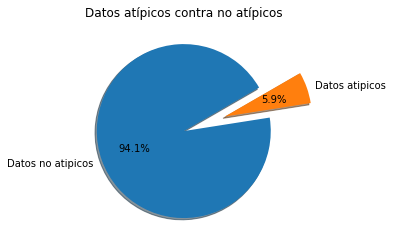

In [13]:
total_rows, _ = moderate_corr_credit_card_df.shape
resultant_rows, _ = credit_card_clean_df.shape

labels = 'Datos no atipicos', 'Datos atipicos'
sizes = [resultant_rows, total_rows-resultant_rows]
explode = (0, 0.5)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=30)
plt.title('Datos atípicos contra no atípicos')
plt.show()

Ahora que quitamos los datos atípicos, procederemos a mostrar sus respectivos boxplots. Al igual que al inicio del notebook, el procesamiento de todos estos boxplots conlleva a una gran carga en el la computadora, por lo cual se añadirá el código para generar los gráficos de caja junto a el gráfico generado.
#### Boxplot con atípicos
Code: `px.box(moderate_corr_credit_card_df).show()`
![Boxplot del dataframe resultante](assets/boxplot-con-atipicos.png)
#### Boxplot sin atípicos
Code: `px.box(credit_card_clean_df).show()`
![Boxplot del dataframe resultante](assets/boxplot-sin-atipicos.png)

### Exportación de datos
Ahora que tenemos nuestros datos limpios procederemos a exportarlos. Antes de hacerlo, optaremos por exportar tanto los datos atípicos como no atípicos para su posterior análisis en las métricas de los modelos generados.
El dataset con los datos atípicos tendrá el nombre de `creditcard_non_atypical.csv` y el que no tiene tendrá el nombre de `creditcard_atypical.csv`

In [14]:
credit_card_clean_df.to_csv('creditcard_non_atypical.csv')
moderate_corr_credit_card_df.to_csv('creditcard_atypical.csv')

### ¿Por que se escogió este dataset?
Inicialmente teníamos la idea de crear un modelo NLP NER pero debido a algunas complicaciones tanto con las GPU, permisos con las quotas, algunos problemas para actualizar la suscripción a developer (no aparecía mi suscripción para actualizarla) y la cantidad de dinero a invertir, decidimos que era mucho mas sencillo y rápido optar por resolver otro problema.

Es por esta razón que dejamos los dataset y las definiciones de las etiquetas de nuestro NLP NER para buscar algún dataset que nos interesara para crear modelos usando AUTOML.

En el proceso encontramos el dataset que se uso en este notebook que trata sobre predecir que transacción es fraudulenta o no. El motivo principal para usar este dataset, es que como vimos en clases, AutoML trata de buscar el mejor modelo sin que nosotros tengamos que probar entre varios manualmente uno por uno, y teniendo en cuenta que el dataset no es tan explicito con los datos que se usan, pensamos que seria una excelente oportunidad para dejar que AutoML encontrase un modelo para estos datos con columnas y valores tan poco descriptivos.